BAGGING

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Assign all the rows up to the 8th column of the data to X
X = data.iloc[:,0:8].values

# Assign the 9th column of the same data to Y
y = data["class"].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [7]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Create a decision tree classifier named cart
cart = DecisionTreeClassifier()

# The estimator will be set to 100, which is equal to the number of trees
num_trees = 100

#### __Apply the bagging technique__

* `oob_score`: This is a method of measuring the prediction error of random forests, bagging, and other ensemble methods that involve bootstrap aggregating

We'll talk about it in detail below

In [8]:
# Create a bagging classifier with the decision tree classifier (cart) as the base estimator
# Ensure oob_score is enabled
bagging_model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=12, oob_score=True)

# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold)

# Print the cross-validation results
print(results)

[0.79032258 0.67741935 0.75806452 0.70967742 0.86885246 0.78688525
 0.63934426 0.7704918  0.73770492 0.72131148]


In [9]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.7460074034902168


___________________________Bagging Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

# Confusion matrix


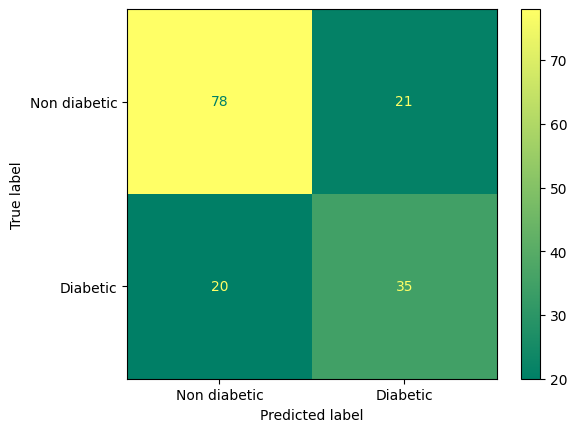

In [10]:
# fitting  and evaluating Bagging classifier model in training and test dataset

bagging_model.fit(X_train_scaled,y_train)
print('___________________________Bagging Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = bagging_model.predict(X_test_scaled)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()